# In this Exploratory Data Analysis, I will analyze courses provided by online course platform Udemy.

Here some introductory infos about Udemy: 

- Udemy, Inc. is an American massive open online course provider aimed at professional adults and students.

- It was founded in May 2010 by Eren Bali, Gagan Biyani, and Oktay Caglar.

- As of Jan 2020, the platform has more than 35 million students and 57,000 instructors teaching courses in over 65 languages.

As usual, first thing first, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = 'iframe'

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Knowing Dataset

In [3]:
df = pd.read_csv("udemy_courses.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
df.shape

(3678, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [6]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [7]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


Based on above outputs, we can make the following cahnges and arrabgements in our dataset:
- Since 'course ID' and course 'url' would not be necessary for our analysis, we can drop them.
- 'published_timestamp', which displays courses' published date, is given in object format. We neeed to format it as a datetime object so that we can work on it.
- There is no missing value, which means less work in preparation stage.
- Since 'level' column is categorical variable, we can use it to see whether there are significant differences among the levels.
- Numerical variables deserves special attention for further analysis.

# Preparing Dataset

Firstly, let's create a new column called 'date' in datetime format then drop unnecessary columns we have mentioned above.

In [8]:
df["date"] = pd.to_datetime(df["published_timestamp"])

# df["date"] = df["published_timestamp"]astype(datetime64[ns])

In [9]:
df.sample(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,date
505,1095700,Using Xero for your bookkeeping needs do beau...,https://www.udemy.com/xero-101/,True,95,39,6,28,Beginner Level,1.0,2017-02-27T16:33:33Z,Business Finance,2017-02-27 16:33:33+00:00
2102,866528,Advanced Trombone Studies - Learn to Master th...,https://www.udemy.com/advanced-trombone/,True,50,39,2,136,All Levels,8.0,2016-07-05T23:21:53Z,Musical Instruments,2016-07-05 23:21:53+00:00


In [10]:
df = df.drop(["course_id", "url", "published_timestamp"], axis=1).copy()
df.sample(2)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,date
911,Cómo Crear Políticas Contables bajo NIIF para ...,True,20,27,5,6,All Levels,1.0,Business Finance,2015-08-25 16:18:04+00:00
3630,XML XQuery - Crash Course for Beginners,True,45,426,4,10,All Levels,1.0,Web Development,2017-02-19 22:52:36+00:00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   course_title      3678 non-null   object             
 1   is_paid           3678 non-null   bool               
 2   price             3678 non-null   int64              
 3   num_subscribers   3678 non-null   int64              
 4   num_reviews       3678 non-null   int64              
 5   num_lectures      3678 non-null   int64              
 6   level             3678 non-null   object             
 7   content_duration  3678 non-null   float64            
 8   subject           3678 non-null   object             
 9   date              3678 non-null   datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(4), object(3)
memory usage: 262.3+ KB


Nice and neat. 

# Analyzing Dataset

In [12]:
df.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,40.108755,4.094517
std,61.005755,9504.117010,935.452044,50.383346,6.053840
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,15.000000,1.000000
50%,45.000000,911.500000,18.000000,25.000000,2.000000
75%,95.000000,2546.000000,67.000000,45.750000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000


Based on our observation on general statistical infos iferred from the above code, we can say that:

- While minimum values are 0, maximum values are in hundreds or thousands for the variables in our dataset.
- Differences between mean and median are big. All mean values are significantly higher than median values. This picture shows us that we will have a positivly skewed distribution with some outliers on maximum side of the distribution. Since median is more resilant to outliers that mean is, we will adopt median based approach in our analysis.
- Median value for the price is 45.
- Median value for the number of subscribers for the courses is approximately 912.
- Median value for the number of reviews is 18.
- Median value for the number of lectures is 25.
- Median value for the content duration is 2.

#### Price of Udemy Courses

In [13]:
fig = px.histogram(data_frame=df, x="price",marginal="box",title="Price of Udemy Courses")
fig.show()

According to the histogram above, UDEMY has 310 free course and it's 295 courses are priced as $200 . As we expected, there is highly right skewed distribution.

We can see right_skewness with a separate boxplot below.

In [21]:
fig = px.box(df, x="price", hover_data=df[["course_title", "subject"]], title="Price of Udemy Courses")
fig.update_traces(quartilemethod="inclusive")
fig.show()

#### Number of Subscribers of UDEMY Courses

In [19]:
fig = px.histogram(data_frame=df, x="num_subscribers", marginal="box", title="Number of Subscribers of UDEMY Courses")
fig.show()

While there are courses without any subscriber, some have 268923 of them. As expected, we have higly rigth skewed distribution here, as well.

In [22]:
fig = px.box(df, x="num_subscribers", hover_data=df[["course_title", "subject"]], title="Number of Subscribers of UDEMY Courses")
fig.update_traces(quartilemethod="inclusive")
fig.show()

#### Number of Reviews of UDEMY Courses

In [24]:
fig = px.histogram(data_frame=df, x="num_reviews", marginal="box", title="Number of Reviews of Udemy Courses")
fig.show()

Number of reviews ranges from 0 to 27445. Again highly skewed distribution.

In [26]:
fig = px.box(df, x="num_reviews", hover_data=df[["course_title", "subject"]], title="Number of Reviews of Udemy Courses")
fig.update_traces(quartilemethod="inclusive")
fig.show()

#### Number of Lectures of UDEMY Courses

In [27]:
fig = px.histogram(data_frame=df, x="num_lectures", marginal="box", title="Number of Lectures of UDEMY Courses")
fig.show()

There are lots of courses gather in range of 20-45. As we expected, we have highly skewed distribution with some outliers on the rigth side of the distribution.  

#### Durations of UDEMY Courses

In [28]:
fig = px.histogram(data_frame=df, x="content_duration", marginal="box", title="Durations of UDEMY Courses")
fig.show()

There are lots of courses gather in range of 0-3 hours. As we expected, we have highly skewed distribution with some outliers on the rigth side of the distribution.  

Beforing moving into further details let's see correlations among variables in our dataset.

In [14]:
df.corr()

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417
price,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000


In [23]:
fig = px.imshow(df.corr(), width=1200, height=600)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

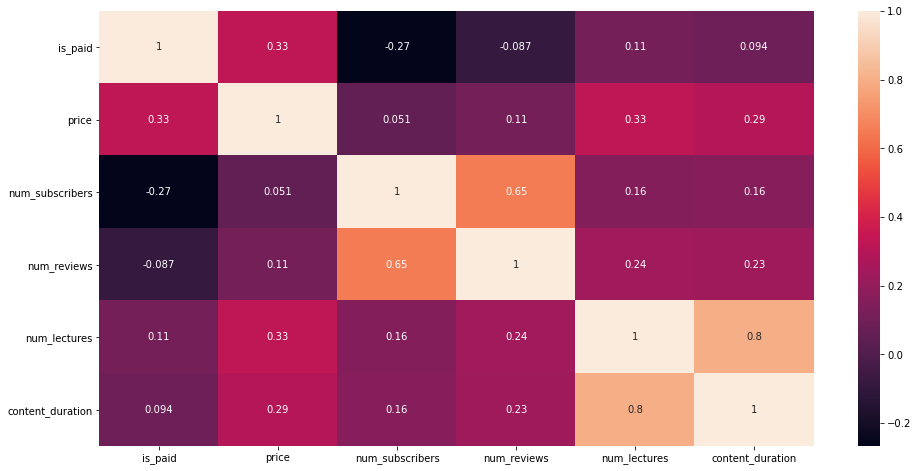

In [25]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True);

In [26]:
df.corr()

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417
price,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000


Based on observation, we can inferred that:
- There is a positive, not strong relation between number of reviews and number of subscribers. 
- There is hardly a relation between price and number of subscribers.
- There is almost a strong, positive relation between number of lectures and content duration.

Let's dive further into analysis of courses by different variables.

**By Subject**

In [27]:
df.subject.value_counts(normalize=True) * 100

Web Development        32.626427
Business Finance       32.490484
Musical Instruments    18.488309
Graphic Design         16.394780
Name: subject, dtype: float64

We can see that Web Development and Business Finance are the top most popular subjects in Udemy courses (not surprising) follwed Musical Instruments (I am surprised that there are lots of people that are subscribed to online musical instruments course) and Graphic Design.

In [36]:
fig = px.histogram(data_frame=df, x="subject", title="Subjects of Udemy Courses")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [37]:
df['year'] = df['date'].dt.year
subject_by_year = df.groupby('year')['subject'].value_counts().reset_index(level=0).rename(columns={'subject': 'subject count'}, index={'index': 'Subject'})
subject_by_year                                                                                            

,year,subject count
subject,,
Web Development,2011,5
Web Development,2012,19
Graphic Design,2012,10
Musical Instruments,2012,10
Business Finance,2012,6
Business Finance,2013,84
Web Development,2013,56
Musical Instruments,2013,39
Graphic Design,2013,23


In [38]:
fig = px.line(data_frame=subject_by_year, x='year', y='subject count', color= subject_by_year.index, title='UDEMY Courses By Subject in Each Year')
fig.show()

Until 2015, Web Development and Business Finance Courses increased. However, while Web Develeopment courses continued this raise in 2016, Business Finance stagnated. Since we do not have data for second half of 2017, it seems that there is decrease in each subject. Let's make no assumption on 2017.

**By Level**

In [42]:
np.round(df["level"].value_counts(normalize=True) * 100,0)

All Levels            52.0
Beginner Level        35.0
Intermediate Level    11.0
Expert Level           2.0
Name: level, dtype: float64

- 52% of the Udemy Courses is for all levels learners.
- Beginner level courses make up 35% of all of the courses
- 10% courses offered by UDEMY is in the intermediate level.
- 2% courses offered by UDEMY appeals to advance or exper level learners.

In [44]:
fig = px.histogram(data_frame=df, x="level", title="Levels of Udemy Courses")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [48]:
level_by_year = df.groupby("year")["level"].value_counts().reset_index(level=0).rename(columns={"level":"level count"}, index={"index":"Level_of_Courses"})   

In [49]:
level_by_year

,year,level count
level,,
All Levels,2011,5
All Levels,2012,33
Beginner Level,2012,9
Intermediate Level,2012,3
All Levels,2013,102
Beginner Level,2013,73
Intermediate Level,2013,18
Expert Level,2013,9
All Levels,2014,272


In [50]:
fig = px.line(data_frame=level_by_year, x='year', y='level count', color= level_by_year.index, title='UDEMY Courses By Level in Each Year')
fig.show()

It can be observed that:
- All levels of Udemy courses except for Expert Level increased consistently by each year.

**By Number of Subscribers, Number of Reviews, Number of Lectures**

Let's create a new dataset that contains only those columns we want to work with. 

In [53]:
df_new = df.groupby("year")[['num_subscribers','num_reviews','num_lectures']].sum().reset_index()
df_new

,year,num_subscribers,num_reviews,num_lectures
0,2011,119028,4041,574
1,2012,555339,10272,2374
2,2013,1723438,48585,7261
3,2014,1930406,86667,19288
4,2015,3475324,196810,41930
5,2016,2966644,195429,50854
6,2017,988941,32917,25239


In [55]:
fig = px.line(data_frame=df_new, x='year', y=['num_subscribers','num_reviews','num_lectures'], title='UDEMY Courses By Number of Subscribers, Number of Reviews, Number of Lectures')
fig.show()

Number of subscribers increased constantly till 2015 and then experienced a decrease in 2016. Since 2017 data does not fully cover the 2017, it would be better not to make any assumption on 2017.

**By Price and Courses**

In [64]:
paid_by_year = df.groupby('year')['is_paid'].value_counts().reset_index(level=0).rename(columns={'is_paid': 'paid_free count'}, index={'index': 'is_paid'})
paid_by_year

,year,paid_free count
is_paid,,
True,2011,5
True,2012,41
False,2012,4
True,2013,185
False,2013,17
True,2014,439
False,2014,52
True,2015,952
False,2015,62


In [66]:
fig = px.line(data_frame=paid_by_year, x='year', y='paid_free count', color= paid_by_year.index)
fig.show()

Number of paid_courses increased a lot between 2011 and 2016 (no assumption on 2017). We can see slight increase in the number of free cources, as well.

In [69]:
top_15_paid_courses = df[["course_title", "year", "subject", "num_subscribers"]][df["is_paid"]==True].sort_values(by="num_subscribers", ascending=False)[:15]

In [71]:
# Can be done in the following way, as well.

# top_15_paid_courses = df[df['price']!=0][['course_title','year','subject','num_subscribers']].sort_values(by= 'num_subscribers',ascending=False).head(15)
# top_15_paid_courses

In [70]:
top_15_paid_courses

,course_title,year,subject,num_subscribers
3230,The Web Developer Bootcamp,2015,Web Development,121584
3232,The Complete Web Developer Course 2.0,2016,Web Development,114512
2619,Learn Javascript & JQuery From Scratch,2013,Web Development,84897
3247,JavaScript: Understanding the Weird Parts,2015,Web Development,79612
1979,Pianoforall - Incredible New Way To Learn Pian...,2014,Musical Instruments,75499
3204,Angular 4 (formerly Angular 2) - The Complete ...,2016,Web Development,73783
2701,Become a Web Developer from Scratch,2011,Web Development,69186
3246,Learn and Understand AngularJS,2014,Web Development,59361
3251,Learn and Understand NodeJS,2015,Web Development,58208
2662,The Complete HTML & CSS Course - From Novice T...,2015,Web Development,57422


In [79]:
fig = px.bar(top_15_paid_courses, y= 'num_subscribers', x='course_title', hover_data = top_15_paid_courses[['year','subject']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(xaxis = go.layout.XAxis(tickangle = 45))
fig.show()

Seems that Web Development subject is the mst popular course subject provided by Udemy.

In [75]:
top_15_non_paid_courses = df[["course_title", "year", "subject", "num_subscribers"]][df["is_paid"]==False].sort_values(by="num_subscribers", ascending=False)[:15]

In [ ]:
# Can be done in the following way, as well.

# top_15_non_paid_courses = df[df['price']==0][['course_title','year','subject','num_subscribers']].sort_values(by= 'num_subscribers',ascending=False).head(15)
# top_15_free_courses

In [76]:
top_15_non_paid_courses

,course_title,year,subject,num_subscribers
2827,Learn HTML5 Programming From Scratch,2013,Web Development,268923
3032,Coding for Entrepreneurs Basic,2013,Web Development,161029
2783,Build Your First Website in 1 Week with HTML5 ...,2014,Web Development,120291
1896,Free Beginner Electric Guitar Lessons,2012,Musical Instruments,101154
2589,Web Design for Web Developers: Build Beautiful...,2015,Web Development,98867
3289,Practical PHP: Master the Basics and Code Dyna...,2014,Web Development,83737
3665,Beginner Photoshop to HTML5 and CSS3,2012,Web Development,73110
2782,Web Development By Doing: HTML / CSS From Scratch,2013,Web Development,72932
3325,HTML and CSS for Beginners - Build a Website &...,2015,Web Development,70773
492,Bitcoin or How I Learned to Stop Worrying and ...,2013,Business Finance,65576


In [80]:
fig = px.bar(top_15_non_paid_courses, y= 'num_subscribers', x='course_title', hover_data = top_15_non_paid_courses[['year','subject']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(xaxis = go.layout.XAxis(tickangle = 45))
fig.show()

We have the same picture in free courses. Web Development dominates again.

In [81]:
top_15_price = df[['course_title','year','subject','num_subscribers', 'price']].sort_values(by=['price','num_subscribers'], ascending=False).head(15)
top_15_price

,course_title,year,subject,num_subscribers,price
3230,The Web Developer Bootcamp,2015,Web Development,121584,200
3232,The Complete Web Developer Course 2.0,2016,Web Development,114512,200
1979,Pianoforall - Incredible New Way To Learn Pian...,2014,Musical Instruments,75499,200
1213,Photoshop for Entrepreneurs - Design 11 Practi...,2016,Graphic Design,36288,200
3233,Ultimate Web Designer & Developer Course: Buil...,2015,Web Development,33788,200
3206,PHP for Beginners -Become a PHP Master - Proje...,2015,Web Development,28880,200
2621,The Ultimate Web Developer How To Guide,2015,Web Development,24861,200
1526,How To Make Graphics For A Website,2014,Graphic Design,24857,200
3117,1 Hour JavaScript,2013,Web Development,22999,200
2755,Become A Web Developer And Seller - Build Webs...,2013,Web Development,21730,200


In [82]:
fig = px.bar(top_15_price , y= 'num_subscribers', x='course_title', hover_data = top_15_price[['price','year']], color='subject')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Most expensive courses are $ 200, and all of the subjects areas are in the top 15 expensive course list.

**Here, we have completed our analysis. Have a fun reading.**